<a href="https://colab.research.google.com/github/CalebaR/MAT-421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**20.1: Numerical Differentiation Problem Statement**\
Numerical differentiation is used to approximate the derivative of a function at certain points. Since we are using computers we compute the derivative at discrete values, even if the function is continuous. It is helpful to remember that a derivative is a slope of a curve at a certain point which tells us the rate the function is changing at that certain point.

**20.2: Finite Difference Approximating Derivatives**\
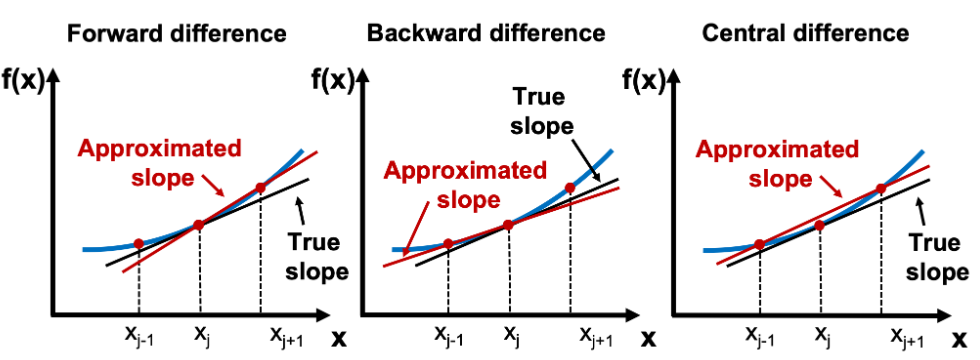
There are three main algorithms for computing numerical derivatives. Central difference algorithm is the most accurate while being the least computationally demanding.

In [6]:
import numpy as np

f = np.linspace(0,98)
print(np.diff(f)) #this give the spacing between each element in the array
print(len(f))
print(len(np.diff(f)))

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2.]
50
49


0.049984407218554114


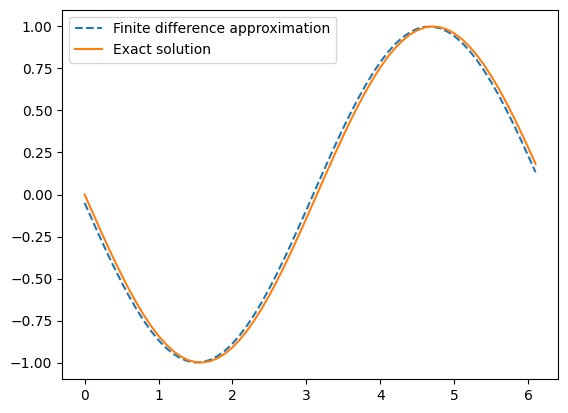

In [19]:
#now we can compute the numerical derivate of cos(x)

h = 0.1 #step size
x = np.arange(0, 2*np.pi, h) #define grid
y = np.cos(x)#compute function

# compute vector of forward differences
forward_diff = np.diff(y)/h
# compute corresponding grid
x_diff = x[:-1:]
# compute exact solution
exact_solution = -np.sin(x_diff)

# Plot solution
import matplotlib.pyplot as plt

plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()

# Compute max error between numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

1.4900000000002933


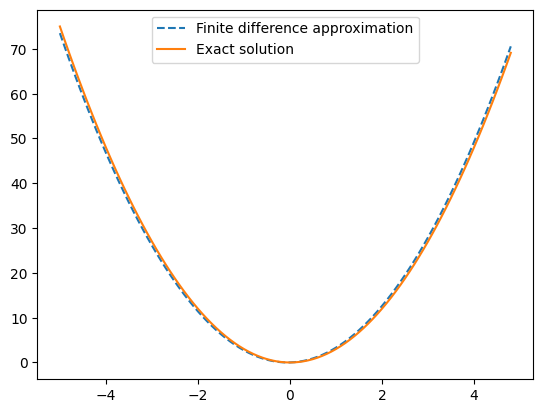

In [32]:
#now we can compute the numerical derivate of x^3

h = 0.1 #step size
x = np.arange(-5, 5, h) #define grid
y = x**3 #compute function

# compute vector of forward differences
forward_diff = np.diff(y)/h
# compute corresponding grid
x_diff = x[:-1:]
# compute exact solution
exact_solution = 3*x_diff**2

# Plot solution
import matplotlib.pyplot as plt

plt.plot(x_diff, forward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()

# Compute max error between numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

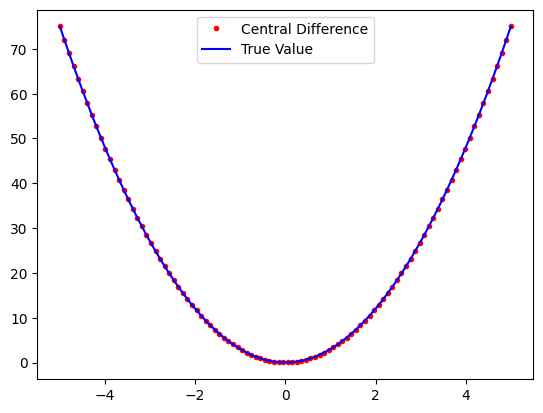

In [38]:
#creating central difference

def derivative(f,a,method='central',h=0.01): #central difference formula
  return (f(a + h) - f(a - h))/(2*h)

myfunc = lambda x: x**3

x = np.linspace(-5,5,100)
dydx = derivative(myfunc,x)

actual = 3*x**2

plt.plot(x,dydx,'r.',label='Central Difference')
plt.plot(x,actual,'b',label='True Value')

plt.legend(loc='best');

**20.3: Approximating of Higher Order Derivatives**

<ipython-input-45-3be1a377769d>:12: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  a1 = derivative(f,0,dx=0.001,n=1)
<ipython-input-45-3be1a377769d>:13: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  a2 = derivative(f,0,dx=0.001,n=2) / 2 #n is the order of the derivative
<ipython-input-45-3be1a377769d>:14: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  a3 = derivative(f,0,dx=0.001,n=3,order=5) / 6


3.0 1.9999983891239026e-06 -1.50000037502096 1.9999920608526622


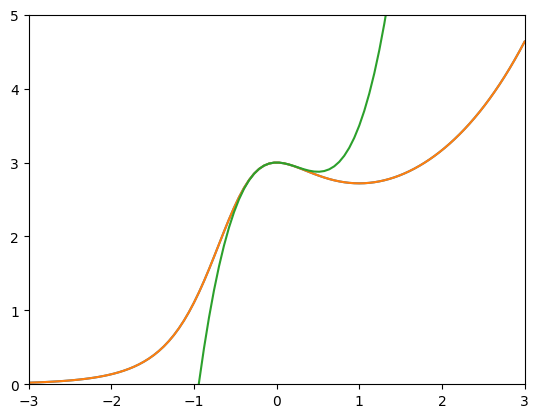

In [45]:
# helpful source: https://patrickwalls.github.io/mathematicalpython/differentiation/differentiation/

from scipy.misc import derivative #this also uses central difference


x = np.linspace(-3,3,100)
f = lambda x: 3*np.exp(x) / (x**2 + x + 1)
y = f(x)
plt.plot(x,y);

a0 = f(0)
a1 = derivative(f,0,dx=0.001,n=1)
a2 = derivative(f,0,dx=0.001,n=2) / 2 #n is the order of the derivative
a3 = derivative(f,0,dx=0.001,n=3,order=5) / 6

print(a0,a1,a2,a3)

T3 = a0 + a1*x + a2*x**2 + a3*x**3
plt.plot(x,y,x,T3), plt.xlim([-3,3]), plt.ylim([0,5]);

**20.4: Numerical Differentiation with Noise**

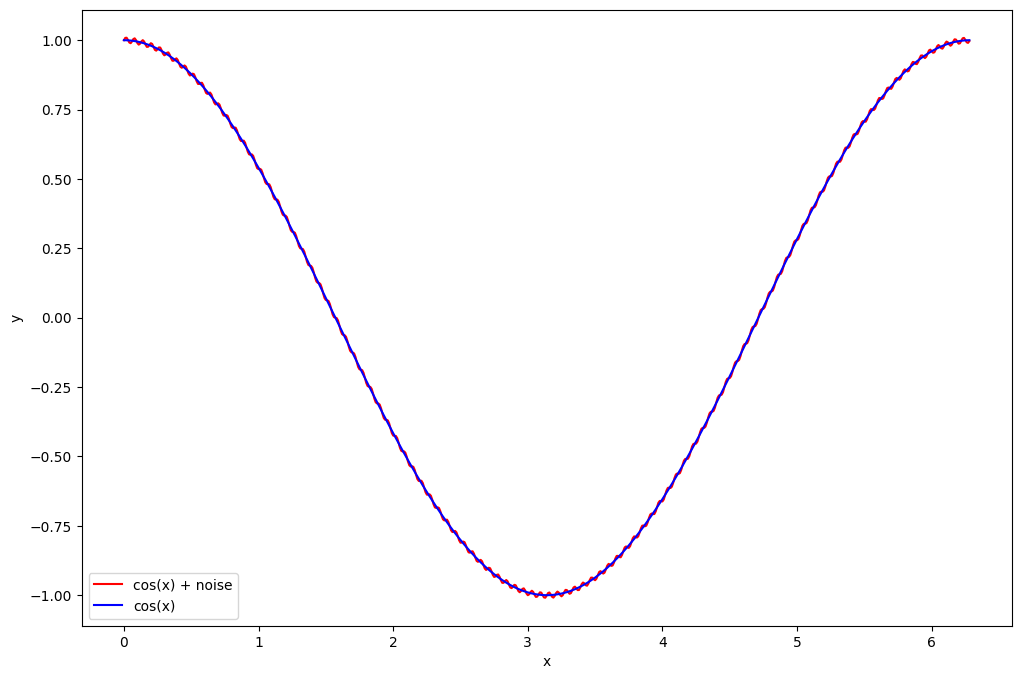

In [47]:
x = np.arange(0, 2*np.pi, 0.01)
# compute function
omega = 100
epsilon = 0.01

y = np.cos(x)
y_noise = y + epsilon*np.sin(omega*x)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.legend();


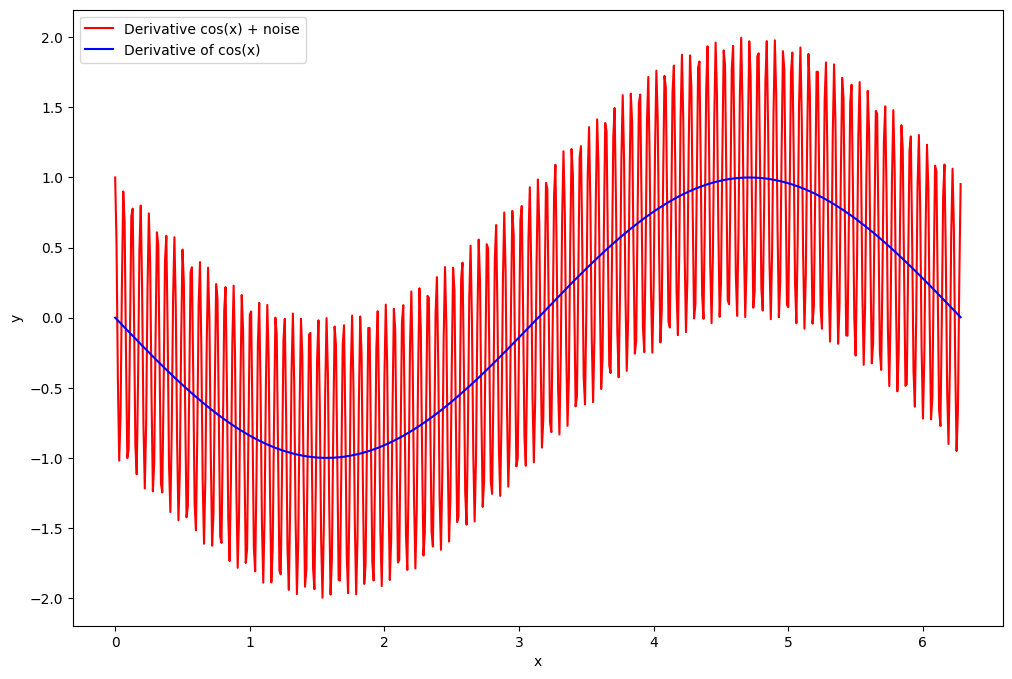

In [48]:
y = -np.sin(x)
y_noise = y + epsilon*omega*np.cos(omega*x)

plt.figure(figsize = (12, 8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')
plt.legend();